In [1]:
#importing python essential libraries, and our MNIST dataset.

import numpy as np
import pandas as pd
test = pd.read_csv("../input/mnist-data/mnist_test.csv")
train = pd.read_csv("../input/mnist-data/mnist_train.csv")

In [2]:
#separating the labels

y_train = train['label']
X_train = train.drop('label', axis = 1)

y_test = test['label']
X_test = test.drop('label', axis = 1)

In [3]:
#So, we have kept 60000 images for training and 10000 for testing
X_train.shape

(60000, 784)

**PCA compression**

In [4]:
#let's first make the copy of our original training data before any transformations
X_train_ = X_train.copy()

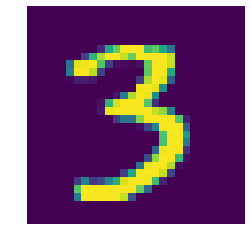

In [5]:
#Plotting a sample image

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(X_train.iloc[10000].to_numpy().reshape(28,28))
plt.axis('off')
plt.show()

In [6]:
#just to be assured!
y_train[10000]

3

In [7]:
#we will keep track of the time taken to perform each transformation and training.
import time

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
start = time.time()
X_reduced = pca.fit_transform(X_train)
end = time.time()

end - start

7.6557416915893555

>PCA took 7 seconds to compress the data! Noted.

In [9]:
#so, only 154 out of 784 features can preserve 95% of the data, 
#this means the MNIST is originally very sparse and most of the data is rather present at a much lower dimension.  
pca.n_components_

154

In [10]:
X_decompress = pca.inverse_transform(X_reduced)

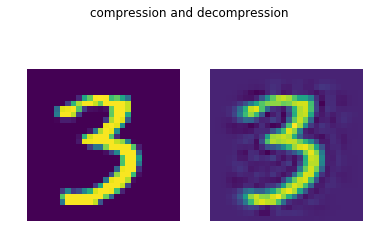

In [11]:
#now that we have got both compressed and decompressed data, let's plot them side by side to see how much we lost(5%)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(X_train.iloc[10000].to_numpy().reshape(28,28))
ax2.imshow(X_decompress[10000].reshape(28, 28))
fig.suptitle('compression and decompression')
ax1.axis('off')
ax2.axis('off')
plt.show()

In [12]:
#classifier: Random Forest on Original data

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 42)
t0 = time.time()
rfc.fit(X_train_, y_train)
t1 = time.time()

t1-t0

58.03475022315979

In [13]:
#score on random forest
rfc.score(X_test, y_test)

0.9705

Random Forest took 59 sec to train the original data with 784 features and that gave a score of 97%!**

> Now let's check how does PCA the time and accuracy with Random Forest.

In [14]:
#classifier: Random Forest on Reduced data

rfc2 = RandomForestClassifier(n_estimators = 100, random_state = 42)
t0 = time.time()
rfc2.fit(X_reduced, y_train)
t1 = time.time()

t1-t0

119.81768345832825

In [15]:
#score of 'random forest' on Reduced data

X_test_reduced = pca.transform(X_test)
rfc2.score(X_test_reduced, y_test)

0.9481

**The Softmax Classifier**

In [16]:
#Classifier: Logistic Regression on Original data

from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 42)
t0 = time.time()
log_clf.fit(X_train_, y_train)
t1 = time.time()

t1-t0

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


24.40460968017578

In [17]:
#score of 'Logistic Regression' on Original data
log_clf.score(X_test, y_test)

0.9255

In [18]:
#time to train on 'Logistic Regression' : Reduced data

log_clf2 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 42)
t0 = time.time()
log_clf2.fit(X_reduced, y_train)
t1 = time.time()

t1-t0

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


13.580160856246948

*wow! Softmax Classifier is 2 times faster on reduced data than on original data. Let's check the model's accuracy as well *

In [19]:
#score of 'Logistic Regression' on Reduced data
log_clf2.score(X_test_reduced, y_test)

0.9201

**Using TSNE**

In [20]:
#creating random 10000 samples of the training data
X_train['label'] = y_train
X = X_train.sample(n=10000, random_state=42)

y = X['label']
X = X.drop('label', axis = 1)

In [21]:
#We will use TSNE to reduce the datset down to 2 Dimensions and then plot it using Matplotlib
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 42)
t0 = time.time()
X_reduced = tsne.fit_transform(X)
t1 = time.time()

t1-t0

282.41543078422546

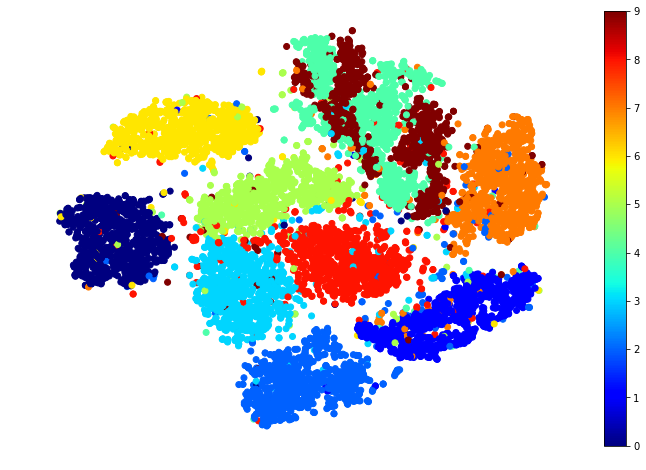

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

In [23]:
idx = (y == 4) | (y == 9) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

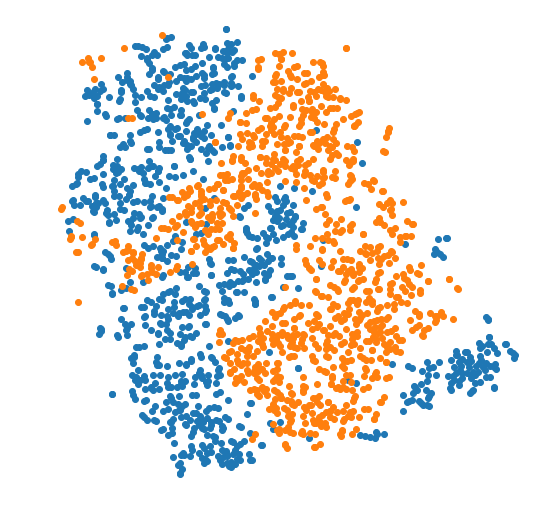

In [24]:
plt.figure(figsize=(9,9))
for digit in (4, 9):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1] )
plt.axis('off')
plt.show()

While they do not overlap as much, still the clusters are stuck together tightly!

Let's try some other visualization techiniques, let's go with PCA for visualization.

**PCA**

0.3104419708251953


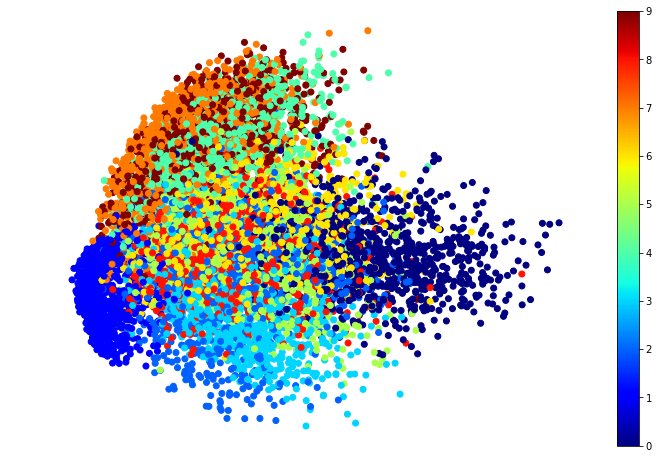

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
t0 = time.time()
X_pca = pca.fit_transform(X)
t1 = time.time()
print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

PCA is extremely fast! But we can clearly see how poor its visualization is. Almost everything is overlapped. 


What would happen if we combine PCA and TSNE?

**PCA + TSNE**

149.67108130455017


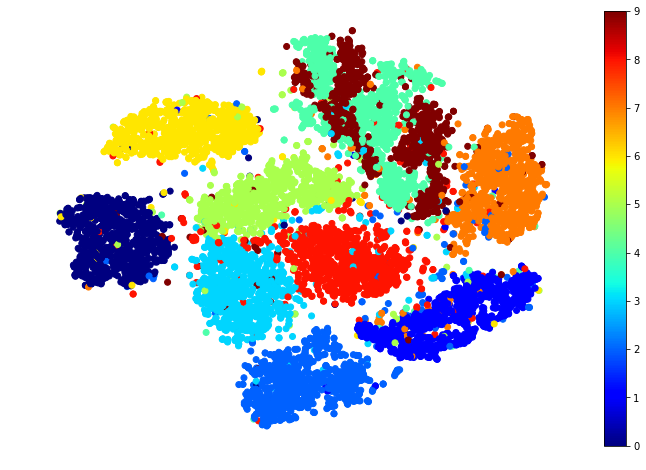

In [26]:
from sklearn.pipeline import Pipeline

pca_tsne = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('tsne', TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne = pca_tsne.fit_transform(X)
t1 = time.time()
print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

Let's now try on few other methods of dimensionality reduction

**LLE: Locally Linear Embedding**

208.03125858306885


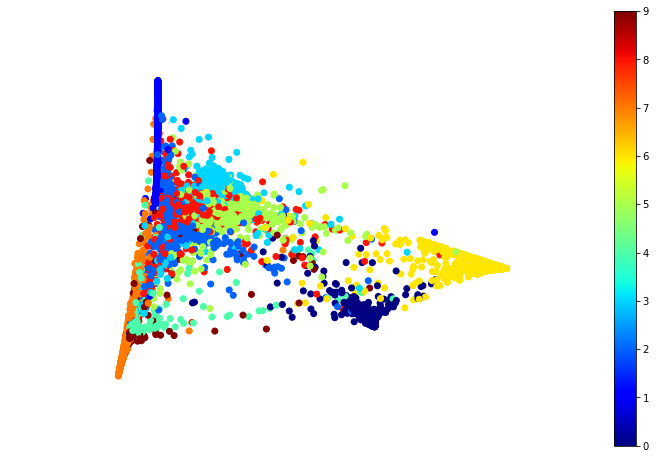

In [27]:
from sklearn.manifold import LocallyLinearEmbedding
t0 = time.time()
X_lle = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print(t1 - t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_lle[:,0], X_lle[:,1], c = y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

**PCA + LLE**

65.44639825820923


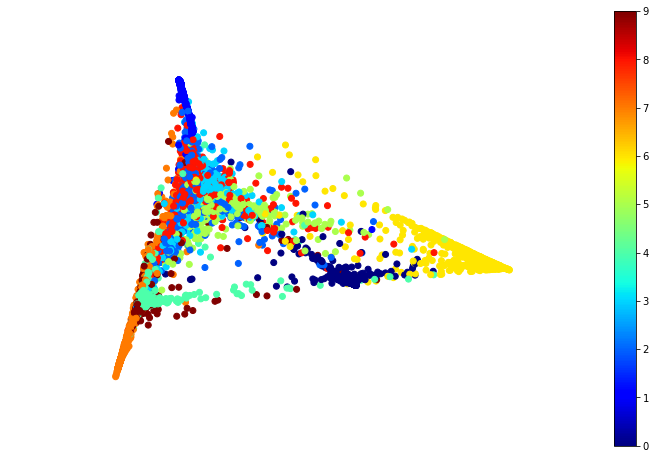

In [28]:
pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle = pca_lle.fit_transform(X)
t1 = time.time()
print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca_lle[:,0], X_pca_lle[:,1], c = y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

LDA: Linear Discriminant Analysis

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


2.3679120540618896


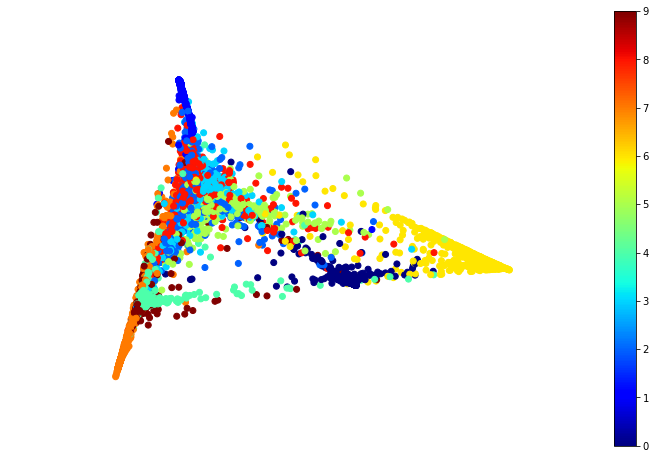

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print(t1 - t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca_lle[:,0], X_pca_lle[:,1], c = y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()